In [1]:
import pandas as pd
import numpy as np

In [5]:

df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

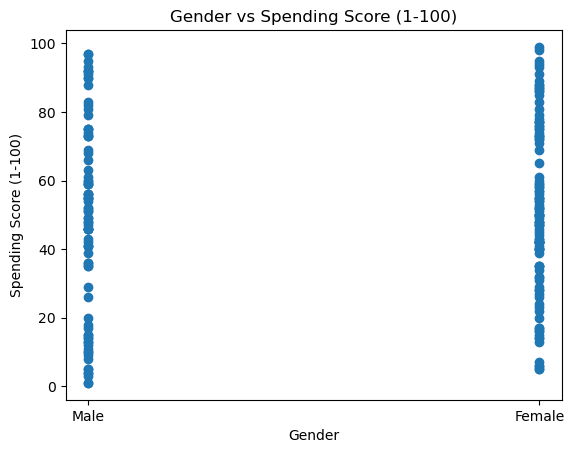

In [25]:
import matplotlib.pyplot as plt

plt.scatter(df["Gender"],df["Spending Score (1-100)"])
plt.title('Gender vs Spending Score (1-100)')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()

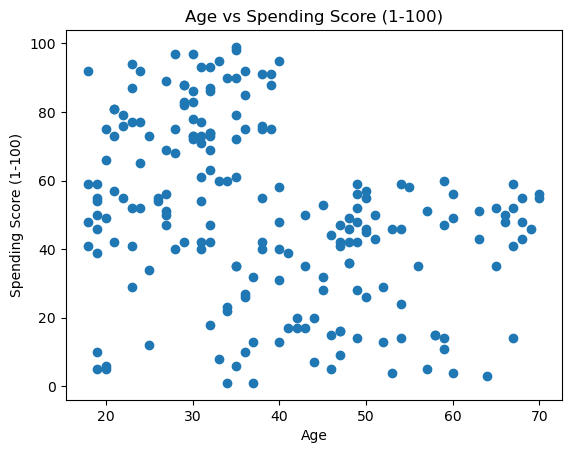

In [26]:
plt.scatter(df["Age"],df["Spending Score (1-100)"])
plt.title('Age vs Spending Score (1-100)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

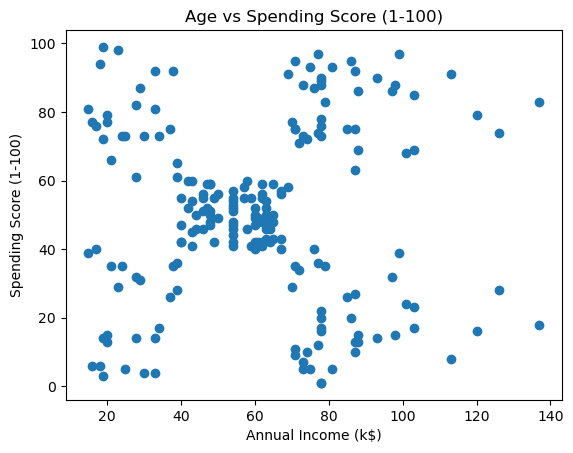

In [28]:


plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.title('Age vs Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [9]:
X=np.array(df.iloc[0:,3:5])
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [10]:
from sklearn.cluster import KMeans

In [12]:
wcss = []
for i in range(1, 11):
   kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
   kmeans.fit(X)
   #appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
   wcss.append(kmeans.inertia_)
    
print(wcss)    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[269981.28, 181363.595959596, 106348.37306211119, 73679.78903948837, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.83934915659, 21850.16528258563, 19672.07284901432]


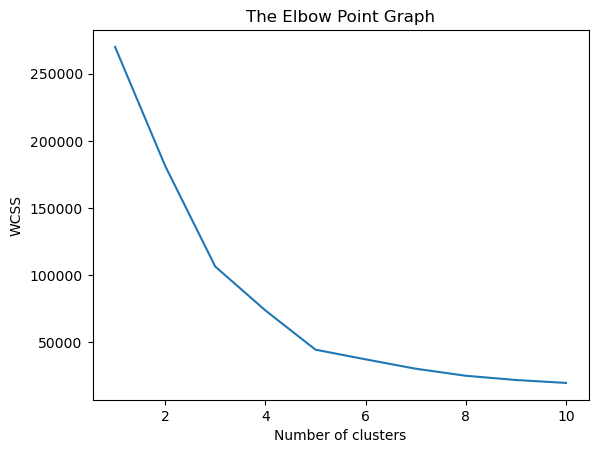

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)

In [15]:
y = kmeans.fit_predict(X)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [16]:
set(y) # no, of clusters

{0, 1, 2, 3, 4}

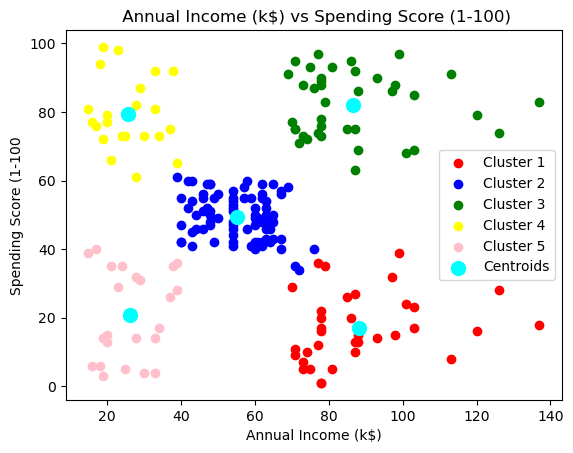

In [31]:
plt.scatter(X[y == 0, 0], X[y == 0, 1],c = 'red', label = 'Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1],c = 'blue', label = 'Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], c = 'green', label = 'Cluster 3')
plt.scatter(X[y == 3, 0], X[y == 3, 1], c = 'yellow', label = 'Cluster 4')
plt.scatter(X[y == 4, 0], X[y == 4, 1], c = 'pink', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'cyan', label = 'Centroids')
plt.title(" Annual Income (k$) vs Spending Score (1-100)")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100')
plt.legend()
plt.show()


In [18]:
from sklearn.metrics import silhouette_score #  silhouette_score = (b - a) / max(a, b) 

In [ ]:
#the mean intra-cluster distance ( a )
#the mean nearest-cluster distance ( b ) for each sample

In [19]:
silhouette_score(X,kmeans.labels_) #range is [-1 to 1] ,  close to 1 is good model and close to -1 is bad

0.553931997444648

In [ ]:
#The Dunn index means smallest inter-cluster distance and the largest intra-cluster distance.
#DIm=min(Ci,Cj)/max((Ci,Cj))

In [30]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X,kmeans.labels_)

0.5725628995597087

In [21]:
a=int(input())
b=int(input())
new_customer_details=[a, b]

predection_new_customer_catagory = kmeans.predict(np.array([new_customer_details]))
print("New customer belongs to:",predection_new_customer_catagory," catagory")

10
12
New customer belongs to: [4]  catagory
